<h1 style="text-align: center;"><span style="color: #ff0000;">PROJET PYTHON-TWITTER </span></h1>

<h3>Participants:</h3>
<ul>
<li>
<h3>ASSI Junior</h3>
</li>
<li>
<h3>YAPI Luc-Aymar</h3>
</li>
<li>
<h3>KONE Diebachir&nbsp;</h3>
</li>
</ul>

## INTRODUCTION

<p><strong>Twitter</strong> est un réseau social populaire grace auquel les utilisateurs peuvent partager des "Short SMS" appelés tweets.</p>
<p>Les utilisateurs partagent leur pensés, des liens, les journalistes commentent des èvenements en temps réel, les entreprises font la promotion de leur produit et récolte les avis de leur client,etc . De ce qui précède on se end compte qu'il ya énormement de choses que nous pouvons faire avec Twitter surtout quand nous savons que plus 500 millions de tweets sont écris chaque jour, ce qui represente une grande masse donnée à étudier.</p>
<p> <strong>Dans ce projet nous nous interresons aux interactions entre python et twitter à travers L'API Twitter.</strong></p>
<strong>Qu'est ce qu'une API?</strong>
<p>la littérature nous fournis plusieurs définission concernant cette notion mais pour nous la plus explicite est celle ci :</p>
<p><strong>Une API ( Interface de programmation applicative) permet de rendre disponibles les données ou les fonctionnalités <p>d’une application existante afin que d’autres applications les utilisent.</strong></p>
Pour les utiliser, la plupart des API requièrent une clé (API key), voire parfois deux. Cette clé permet à l’API  de vous identifier comme étant un utilisateur ayant les droits nécessaires pour se servir de l’API.
Une des principales fonctionnalités qu’on retrouve quand on utilise une API est la récolte des données. Ces données nous sont fournir le plus souvent au format json qui est un format de donnée structuré.</p>

<p>Pour découvrir ce monde magnifique qui est celui de l'utiliation des api avec PYTHON, nous avons structuré notre travail de la manière suivante :</p>
<p> <strong> 1. Connection à L'API Twitter</strong></p>
<p> <strong> 2. Collecte des données</strong></p>
<p> <strong> 3. Terms frequencies</strong></p>
<p> <strong> 4. Data visualization</strong></p>
<p> <strong> 5. Sentiment Analysis</strong></p>
<p> <strong> 6. Geolocalization</strong></p>






## 1. Connection à l'API

La première étape est l'enregistrement de votre application. En particulier, vous devez pointer votre navigateur sur http://apps.twitter.com , vous connecter à Twitter (si vous n'êtes pas déjà connecté) et enregistrer une nouvelle application.
Vous pouvez maintenant choisir un nom et une description pour votre application (par exemple, «Démo de Mining» ou similaire). Vous recevrez une clé de consommateur et un code secret de consommateur: ce sont les paramètres de l’application qui doivent toujours rester confidentiels. À partir de la page de configuration de votre application, vous pouvez également exiger un jeton d'accès et un code secret de jeton d'accès. Comme pour les clés de consommateur, ces chaînes doivent également rester confidentielles: elles fournissent à l'application un accès à Twitter au nom de votre compte. Les autorisations par défaut sont en lecture seule, ce qui est tout ce dont nous avons besoin dans notre cas. Toutefois, si vous décidez de modifier votre autorisation pour fournir des fonctionnalités d'écriture dans votre application, vous devez négocier un nouveau jeton d'accès.
<p>Twitter fournit des API REST que vous pouvez utiliser pour interagir avec leur service. Il existe également de nombreux clients basés sur Python que nous pouvons utiliser sans réinventer la roue. En particulier, Tweepy est l’un des plus intéressants et des plus simples à utiliser</p>

Pour autoriser notre application à accéder à Twitter en notre nom, nous devons utiliser l'interface OAuth:

In [1]:
import tweepy

#code secret
consumer_key = 'BrDy3O6rLSExioL5UMWYoq4NL'
consumer_secret = 'Nksy9q7s1oX0W9N7dTe4fxLtS9jpO3KceqhaxIef5hyB3YNpc8'
access_token = '972348726-HxBxRB1c7I20gOwCrKeA8c8GbN8SBWKVdbjqO6Mn'
access_secret = 'sL8crIPknKVxWVvPUoPORNcwGGSQtnP4tEeaFCqBMICJ0' 

#AUthentification des codes secrets
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api=tweepy.API(auth)    

<strong>La variable api est maintenant notre point d'entrée pour la plupart des opérations que nous pouvons effectuer avec Twitter (un exemple ci-desous).</strong>

In [2]:
#pour afficher mes abonnés sur twitter
for status in tweepy.Cursor(api.home_timeline).items(1):
    # Process a single status
    print(status.text)
#pour afficher mes abonnées
for friend in tweepy.Cursor(api.friends).items(1):
    print(friend)

RT @LeChercheurDT2: Merci @RothenJerome. Encore une élite opinion de @DanielRiolo (sur un joueur, car oui, il a une connaissance historique…
User(_api=<tweepy.api.API object at 0x00000278E4DD0EB8>, _json={'id': 235261861, 'id_str': '235261861', 'name': 'RStudio', 'screen_name': 'rstudio', 'location': 'Boston', 'description': 'Open source and enterprise-ready professional software for data science teams using R and Python.', 'url': 'http://t.co/sNW3mienR9', 'entities': {'url': {'urls': [{'url': 'http://t.co/sNW3mienR9', 'expanded_url': 'http://www.rstudio.com', 'display_url': 'rstudio.com', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 108571, 'friends_count': 532, 'listed_count': 1906, 'created_at': 'Fri Jan 07 19:13:28 +0000 2011', 'favourites_count': 2203, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 2384, 'lang': None, 'status': {'created_at': 'Thu Oct 22 10:04:03 +0000 2020', 'id': 13

## 2. Collecte des données

Grâce à la section précendente nous savons comment avoir accès aux données de twitter. Cette partie nous permettras de collecter ces données au format Json (le format de stockage d'origine)

Nous définissons d'abord un répertoire courant i.e un répertoire dans lequel nos fichiers seront enrégistrés automatiquement

In [4]:
import os
#coding: utf-8
os.chdir("C:/Users/assij/Desktop/ASSI_JUNIOR_DESIRE")

Le code ci-dessous nous permet de mettre mes abonnés que j'ai affiché à la section précédente dans un fichier json et illustre aussi l'utilisation de l'api recherche (très utile à notre goût).

In [5]:
import json
with open("python1.json","a") as f :
    for friend in tweepy.Cursor(api.friends).items(10):
             f.write(json.dumps(friend._json))
            
recherche= 'python'
with open("python2.json","a") as f :
    for status in tweepy.Cursor(api.search,q=recherche).items(10):
             f.write(json.dumps(status._json))

Mettons nos données  dans un dataframe pour mieux percevoir sa structrure et faciliter le traitement

In [7]:
import pandas as pd

#rangement des tweets dans un tableau
tweets_data_path = 'data.json'
i=0
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        i=i+1
        #print(line)
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
#nombre de tweets récoltés 
print(len(tweets_data))

#rangement dans un DataFrame Pandas
tweets = pd.DataFrame()
tweets['text'] = [ tweet['text'] for tweet in tweets_data]
tweets['lang'] = [tweet['lang'] for tweet in tweets_data]
tweets['country'] =[tweet['place']['country'] if tweet['place'] != None else None for tweet in tweets_data]
tweets['created_at'] = [tweet['created_at'] for tweet in tweets_data]
tweets['source'] = [tweet['source'] for tweet in tweets_data]
tweets


1833


,text,lang,country,created_at,source
0,RT @unaixxxx: Bein LaLiga entrevistando al árb...,es,None,Mon Feb 25 09:32:39 +0000 2019,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
1,RT @Banquilleros: El penalti por manos del Lev...,es,None,Mon Feb 25 09:32:41 +0000 2019,"<a href=""http://twitter.com/download/android"" ..."
2,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:42 +0000 2019,"<a href=""http://twitter.com/download/android"" ..."
3,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:42 +0000 2019,"<a href=""http://twitter.com/download/android"" ..."
4,RT @IndyFootball: Jose Mourinho says Eden Haza...,en,None,Mon Feb 25 09:32:44 +0000 2019,"<a href=""http://twitter.com/download/android"" ..."
5,RDT implicado en pacto secreto Real Madrid – V...,es,None,Mon Feb 25 09:32:44 +0000 2019,"<a href=""https://www.hootsuite.com"" rel=""nofol..."
6,RT @benyeah54: Donc un Penalty est accordé sur...,fr,None,Mon Feb 25 09:32:46 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r..."
7,RT @Bilel_Bkr: pourquoi quand t’es riche tout ...,fr,None,Mon Feb 25 09:32:47 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r..."
8,RT @FCBarcelona_es: 🔙2⃣0⃣0⃣7⃣\nLeo #Messi marc...,en,None,Mon Feb 25 09:32:50 +0000 2019,"<a href=""http://twitter.com/download/android"" ..."
9,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:50 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r..."


## 3. Terms frequencies

<p>La première analyse exploratoire que nous pouvons effectuer est un simple compte de mots. De cette manière, nous pouvons observer quels sont les termes les plus couramment utilisés dans le jeu de données. Dans cet exemple, je vais utiliser l'ensemble de des tweets que j'ai recolté en temps réel, les mots les plus fréquents doivent donc correspondre aux sujets que je discute (pas nécessairement, mais soyez avec pour quelques paragraphes).
Nous pouvons utiliser un tokeniser personnalisé pour scinder les tweets en une liste de termes.</p>

Mais avant d'effectuer cela il est important de comprendre la structure des données que nous allons étudier et de faire un petit nettoyage de nos tweets
<p>Les attributs clés sont les suivants:</p>

<p><strong> text: le texte du tweet lui-même </strong></p>
<p><strong>created_at: la date de création </strong></p>
<p><strong>favorite_count, retweet_count: le nombre de favoris et de retweets</strong></p>
<p><strong>favorited, retweeted: boolean indiquant si l'utilisateur authentifié (vous) avez préféré ou retweeté ce tweet</strong></p>
<p><strong>lang: acronyme de la langue (par exemple «en» pour l'anglais)</strong></p>
<p><strong>id: l'identifiant du tweet </strong></p>
<p><strong>lieu, coordonnées, géo: informations de géolocalisation si disponibles </strong></p>
<p><strong>utilisateur: le profil complet de l'auteur</strong></p>
<p><strong>entités: liste d'entités comme les URL, les @ -mentions, les hashtags et les symboles</strong></p>
<p><strong>in_reply_to_user_id: identifiant de l'utilisateur si le tweet est une réponse à un utilisateur spécifique</strong></p>
<p><strong>in_reply_to_status_id: identifiant de statut id le tweet est une réponse à un statut spécifique</strong></p>

On remarque que les @ -mentions, les émoticônes, les URL et les # balises hash ne sont pas reconnues 
pour régler cela Le code suivant propose une chaîne de pré-traitement prenant en compte ces aspects du langage.
on utilise dans ce code des notions d'expressions régulières (package re).

In [62]:
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

Vérifions que le prétraitement a été éffectué

In [63]:
tweet = tweets['text'][0]
print(preprocess(tweet))

['RT', '@unaixxxx', ':', 'Bein', 'LaLiga', 'entrevistando', 'al', 'árbitro', 'del', 'Levante', '-', 'Real', 'Madrid', '.', 'https://t.co/cji7XSziUm']


<strong>Cherchons à présent les mots qui se répètent dans tous nos tweets grace au module counter du package collections.</strong>

In [64]:
import json
from collections import Counter
 
fname = 'data1.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        try :
            tweet = json.loads(line)
            # Create a list with all the terms
            terms_all = [term for term in preprocess(tweet['text'])]
            # Update the counter
            count_all.update(terms_all)
        except : 
            continue
    # Print the first 5 most frequent words
    print(count_all.most_common(5))

[('Messi', 249), (':', 225), ('RT', 203), ('.', 168), ('the', 130)]


Nous remarquons que les résultats ne sont pas significatifs 
pour les rendres plus significatifs nous allons supprimer "stop_words".

## enlevons les Stop-words

Dans toutes les langues, certains mots sont particulièrement courants. Bien que leur utilisation dans la langue soit cruciale, ils ne communiquent généralement pas un sens particulier, surtout s'ils sont pris hors contexte ( stop_words) avant de les éliminer nous identifierons les principales langues dans lesquelles nos tweets sont écrites.Pour cela nous allons utlisier le package matplotlib.pyplot

## 5 principales langues

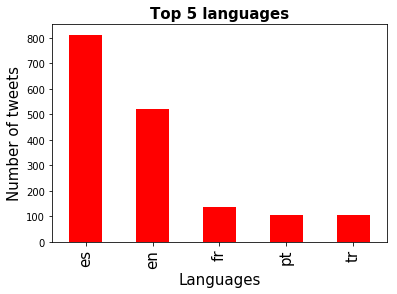

In [65]:
import matplotlib.pyplot as plt

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
plt.show()

 Nous observons les principales langues dans lesquelles sont écrites nos tweets Donc nous allons supprimer 
les différents stopwords de ces langues avec les signes de ponctuations. avec le module stopwords dans le package nltk pour les stopwords et le package string pour la ponctuation.

In [66]:
import nltk
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') +stopwords.words("spanish")+stopwords.words("french")+punctuation + ['RT', 'via',':','…','🆚','✅']

fname = 'data1.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        try :
            tweet = json.loads(line)
            # Create a list with all the terms
            terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
            # Update the counter
            count_all.update(terms_stop)
        except : 
            continue
    # Print the first 5 most frequent words
    print(count_all.most_common(15))


[('Messi', 249), ('like', 47), ('@pudynzayn', 43), ('Do', 43), ('https://t.co/hPNrQ7PsYv', 43), ('’', 42), ('Lionel', 39), ('I', 38), ('Ronaldo', 30), ('@goal', 29), ('League', 28), ('messi', 27), ('Champions', 27), ('scored', 24), ('🐐', 24)]


On peut s'amuser aussi à touver les Hastags les plus couraments tilisés

In [67]:
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]


fname = 'data.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        try :
            tweet = json.loads(line)
            # Create a list with all the terms
            terms_hash = [term for term in preprocess(tweet['text']) 
                              if term.startswith('#')]
            # Update the counter
            count_all.update(terms_hash)
        except : 
            continue
    # Print the first 5 most frequent words
    word_liste = list(count_all.most_common(5))
    print(count_all.most_common(18))





[('#ElClásico', 21), ('#Messi', 17), ('#90Minuti395', 12), ('#MisterFantasy', 12), ('#LaCop', 12), ('#ElClasico', 11), ('#Oscars', 11), ('#RealMadrid', 11), ('#FelizLunes', 10), ('#FelizSeman', 9), ('#LevanteRealMadrid', 8), ('#Video', 7), ('#SpainInEnglish', 5), ('#Barca', 5), ('#HalaMadrid', 4), ('#MisterClásico', 4), ('#NoWordsMessi', 4), ('#LFC', 4)]


## 3. Data visualization

visualisons les termes fréquents

Populating the interactive namespace from numpy and matplotlib


C:\Users\assij\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



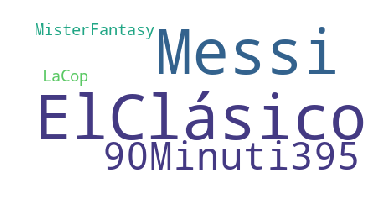

In [68]:
new_list = []
for item in word_liste:
    new_list.append(item[0])



word_string = " ".join(new_list)
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
%pylab inline
wordcloud = WordCloud(stopwords=stopwords, background_color="white")

wordcloud.generate(word_string)

plt.imshow(wordcloud)
plt.axis('off')
pass



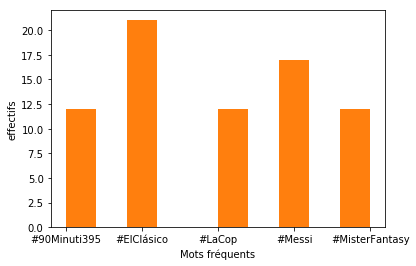

In [69]:
import numpy as np
modalite = []
for item in word_liste:
    modalite.append(item[0])

effectif = []
for item in word_liste:
    effectif.append(item[1])
d=np.repeat(modalite, effectif, axis=0)
plt.hist(d)
plt.xlabel('Mots fréquents')
plt.ylabel('effectifs')
plt.hist(d)
plt.show()

## 4. Sentiment Analysis

De manière générale L'analyse des sentiments est une étude des impressions de personnes vis à vis d'une situation donnée ou plus
simplement l'étude de la conotation (positive comme négative) de données. pour cela on aura besoin dans cette section de plusieurs packages 
en l'occurence un crucial qui est TextBlob. TextBlob est en effet un outil puissant de python permettant de desceller la polarité des données.


In [70]:
#from Ipython.display import display
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

,text,lang,country,created_at,source,SA
0,RT @unaixxxx: Bein LaLiga entrevistando al árb...,es,None,Mon Feb 25 09:32:39 +0000 2019,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1
1,RT @Banquilleros: El penalti por manos del Lev...,es,None,Mon Feb 25 09:32:41 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",0
2,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:42 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",1
3,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:42 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",1
4,RT @IndyFootball: Jose Mourinho says Eden Haza...,en,None,Mon Feb 25 09:32:44 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",1
5,RDT implicado en pacto secreto Real Madrid – V...,es,None,Mon Feb 25 09:32:44 +0000 2019,"<a href=""https://www.hootsuite.com"" rel=""nofol...",1
6,RT @benyeah54: Donc un Penalty est accordé sur...,fr,None,Mon Feb 25 09:32:46 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",1
7,RT @Bilel_Bkr: pourquoi quand t’es riche tout ...,fr,None,Mon Feb 25 09:32:47 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",0
8,RT @FCBarcelona_es: 🔙2⃣0⃣0⃣7⃣\nLeo #Messi marc...,en,None,Mon Feb 25 09:32:50 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",1
9,RT @FBBasketbol: 📆 28 Aralık 2018\n 🆚 Real Mad...,tr,None,Mon Feb 25 09:32:50 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",1


Pourcentage de tweets positifs: 63.884342607746866%
Pourcentage de tweets neutres: 30.16912165848336%
Pourcentage de tweets negatifs: 5.946535733769776%


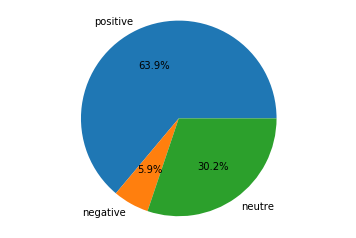

In [71]:
import numpy as np
tab=tweets
tab['SA'] = np.array([ analize_sentiment(tweet) for tweet in tab['text']])
display(tab.head(10))
pos_tweets = [ tweet for index, tweet in enumerate(tab['text']) if tab['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(tab['text']) if tab['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(tab['text']) if tab['SA'][index] < 0]
print("Pourcentage de tweets positifs: {}%".format(len(pos_tweets)*100/len(tab['text'])))
print("Pourcentage de tweets neutres: {}%".format(len(neu_tweets)*100/len(tab['text'])))
print("Pourcentage de tweets negatifs: {}%".format(len(neg_tweets)*100/len(tab['text'])))
a=len(pos_tweets)*100/len(tab['text'])
b=len(neu_tweets)*100/len(tab['text'])
c=len(neg_tweets)*100/len(tab['text'])
lab='positive','negative','neutre'
si=[len(pos_tweets),len(neg_tweets),len(neu_tweets)]
plt.pie(si,labels=lab,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## 4. geolocation and interactive maps

In [72]:
import plotly

In [73]:
import json
f = open("data.json","r")
file = f.readlines()
files = [term for term in file if term not in ["\n"]]
location = list()
lon = list()
lat = list()
for term in files:
    tweets = json.loads(term)
    for i in tweets.keys():
        if i=="place":
            if tweets[i]!= None:
                lon.append(tweets[i]["bounding_box"]["coordinates"][0][0][0])
                lat.append(tweets[i]["bounding_box"]["coordinates"][0][0][1])
                location.append(tweets[i]["name"])
import chart_studio             
import chart_studio.plotly as py
import plotly.graph_objs as go

mapbox_access = 'pk.eyJ1IjoiYWJkb3VsYmFjaGlyIiwiYSI'

token='6ImNqbTZrOXhrZjB5OGkzcW80eHgxMGw1dzkifQ.TDfHNHxj0nFrMgeuExhNHw'
mapbox_access_token =mapbox_access + token
py.plotly.tools.set_credentials_file(username='diebachir',
                            api_key='lWdbplEOipQwob636OhF')

print(lat)
data = [
    go.Scattermapbox(
        lat= lat,
        lon=lon,
        mode='markers',
        marker=dict(
            size=9
        ),
        text=location,
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.92,
            lon=-77.07
        ),
        pitch=0,
        zoom=1
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='interactive_maps')

[41.336062, 42.854479, 42.12938, 41.51714, -6.349273, -35.031373, 41.458364, 10.440464, 51.436221, 40.802734, -21.268154, -27.838936, 41.510091, 53.713041, 28.917743, 43.373074, -7.645184, 40.312071, -7.390594, 12.932937, 39.854344, -22.678395, 40.285747, -18.770806, 54.459211, 40.312071, 28.096608, -23.08302, 48.885598, 42.12938, 50.844534]


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, 'https://plotly.com/~diebachir/2/', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.